In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image
from numpy.fft import fft2, fftshift, ifft2
import cv2 # if you do not have cv2 installed, run from the command line "pip install opencv-python" 
%matplotlib inline 
#show plots in the notebook

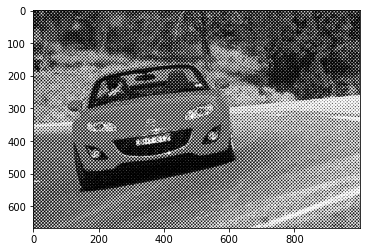

In [2]:
new_im = Image.open("car.png")
np.shape(new_im) # -- We can see that this is RGB image
imshow(new_im, cmap='Greys')

In [3]:
# apply fft2 that refers to 2D fft. fft2() provides us the frequency transform which will be a complex array. It first argument is a greyscale image.
f=np.fft.fft2(new_im)
# next, we apply ffshift() that essentially performs multiplication operation f(x,y)(-1)^(x+y) and then takes the FT of this product.
# we want to place the zero frequency component in the center. Otherwise, it will be at the top left corner. We shift the result in both directions.
fshift=np.fft.fftshift(f)
fshift_copy = fshift.copy()

In [4]:
# we have found DFT
fshift

array([[ 3.86000000e+02-2.84217094e-14j, -5.83240549e+02-3.05439177e+03j,
         9.07297470e+02-1.91343475e+03j, ...,
        -1.10522680e+03+2.60264905e+02j,  9.07297470e+02+1.91343475e+03j,
        -5.83240549e+02+3.05439177e+03j],
       [-3.84726654e+03+5.14244485e+03j,  8.21407273e+02+2.46687054e+02j,
         1.00302161e+03-2.10769270e+02j, ...,
        -2.93236921e+02+1.58500765e+02j, -9.66723621e+01-1.97244083e+01j,
         3.70238323e+02-1.25816595e+03j],
       [-1.67744502e+03+2.66755596e+03j,  1.77036518e+03-1.59951857e+03j,
         1.16294328e+03+1.89689365e+03j, ...,
        -2.71506752e+02+4.97952128e+01j,  5.34407629e+02-1.21178427e+03j,
        -1.77631317e+03+6.65302774e+02j],
       ...,
       [ 1.03245257e+03-3.05421567e+03j,  6.86717199e+02+2.27241985e+02j,
        -9.00656584e+02+9.38276670e+02j, ...,
         2.15780397e+00-3.53461082e+02j, -3.44703544e+02+8.62667473e+01j,
         1.12538718e+03-3.33187603e+02j],
       [-1.67744502e+03-2.66755596e+03j, -1.

In [5]:
# calculate the magnitude of DFT and log scale for the purpose of visualization
magnitude_spectrum=20*np.log(np.abs(fshift))

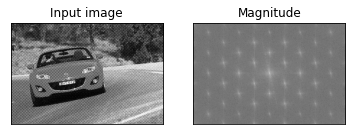

In [6]:
plt.subplot(121), plt.imshow(new_im, cmap='gray')
plt.title('Input image'), plt.xticks([]),plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude'), plt.xticks([]),plt.yticks([])
plt.show()

In [7]:
from skimage.feature import peak_local_max 
coordinates = peak_local_max(magnitude_spectrum, min_distance=1, exclude_border=0)
coordinates

array([[333, 500],
       [400, 600],
       [266, 400],
       ...,
       [  0, 654],
       [ 98,  13],
       [568, 987]])

min-distance is set to be 1 as when min-distance = 1 , maximum number of peaks can be found.

Text(0.5, 1.0, 'The size of the neighbourhood is 3x3')

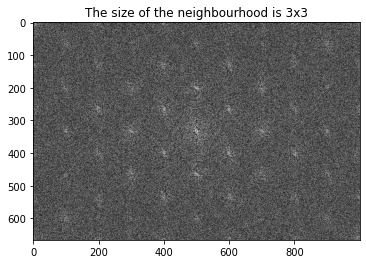

In [8]:
dx,dy=np.shape(new_im)[0], np.shape(new_im)[1] 
new_magnitude=magnitude_spectrum.copy() 
L = 1
for coord in coordinates: 
  i=coord[0] 
  j=coord[1] 
  if i==dx//2 and j==dy//2: 
    continue 
  else: 
    for k1 in np.arange(-L,L,1): 
      for k2 in np.arange(-L,L,1): 
        if i+k1>=0 and j+k2>=0 and i+k1<dx and j+k2<dy: 
            new_magnitude[i+k1,j+k2]=0 
            fshift[i+k1,j+k2]=0 
            # shifted DFT of car image 
imshow(new_magnitude, cmap='gray') 
plt.title("The size of the neighbourhood is "+str(2*L+1)+"x"+str(2*L+1))

In [9]:
# Show the fft with modified frequency components
fshift

array([[    0.           +0.j        ,  -583.24054901-3054.39176612j,
          907.29746956-1913.43475185j, ...,
        -1105.22679598 +260.26490514j,     0.           +0.j        ,
            0.           +0.j        ],
       [    0.           +0.j        ,   821.40727281 +246.6870541j ,
         1003.02161137 -210.76926976j, ...,
         -293.23692079 +158.50076516j,     0.           +0.j        ,
            0.           +0.j        ],
       [    0.           +0.j        ,  1770.36517735-1599.51856688j,
         1162.94327847+1896.89364998j, ...,
         -271.5067519   +49.7952128j ,     0.           +0.j        ,
            0.           +0.j        ],
       ...,
       [    0.           +0.j        ,   686.71719864 +227.241985j  ,
         -900.65658384 +938.2766705j , ...,
            2.15780397 -353.46108238j,     0.           +0.j        ,
            0.           +0.j        ],
       [    0.           +0.j        , -1776.31317404 -665.30277384j,
          534.4076287 

We can find the inverse FT reconstruct isn't in the same intensity range as the original.


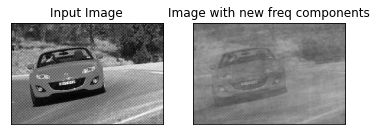

In [10]:
# Perform the inverse Fourier transform
# Shift back (we shifted the center with np.fft.fftshift before)
f_ishift = np.fft.ifftshift(fshift)

# inverse fft to get the image back 
img_back = ifft2(f_ishift)
# take real part of the inverse FT
img_back = img_back.real

plt.subplot(121),plt.imshow(new_im, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Image with new freq components'), plt.xticks([]), plt.yticks([])
print("We can find the inverse FT reconstruct isn't in the same intensity range as the original.")

In [11]:
# Scale intensities to the range [0, 255]
img_back_with_scaled_intensities=(img_back-np.min(img_back))*255.0/(np.max(img_back)-np.min(img_back))

Our restored image is in the same intensity range as the original


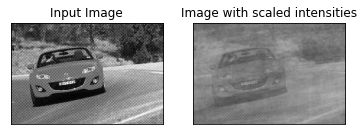

In [12]:
plt.subplot(121),plt.imshow(new_im, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back_with_scaled_intensities, cmap = 'gray')
plt.title('Image with scaled intensities'), plt.xticks([]), plt.yticks([])
print("Our restored image is in the same intensity range as the original")

Text(0.5, 1.0, 'The size of the neighbourhood is 1x1')

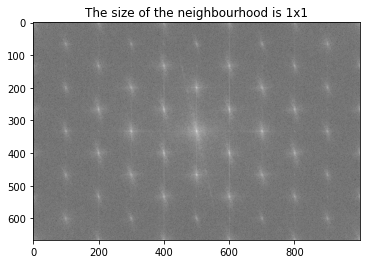

In [13]:
# L = 0
fshift = fshift_copy.copy()
dx,dy=np.shape(new_im)[0], np.shape(new_im)[1] 
new_magnitude=magnitude_spectrum.copy()
L = 0
for coord in coordinates: 
  i=coord[0] 
  j=coord[1] 
  if i==dx//2 and j==dy//2: 
    continue 
  else: 
    for k1 in np.arange(-L,L,1): 
      for k2 in np.arange(-L,L,1): 
        if i+k1>=0 and j+k2>=0 and i+k1<dx and j+k2<dy: 
            new_magnitude[i+k1,j+k2]=0 
            fshift[i+k1,j+k2]=0 
            # shifted DFT of car image 
imshow(new_magnitude, cmap='gray') 
plt.title("The size of the neighbourhood is "+str(2*L+1)+"x"+str(2*L+1))

(Text(0.5, 1.0, 'Image with new freq components'), ([], []), ([], []))

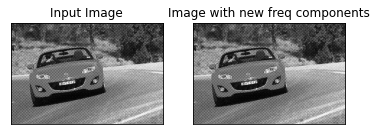

In [14]:
# Perform the inverse Fourier transform
# Shift back (we shifted the center with np.fft.fftshift before)
f_ishift = np.fft.ifftshift(fshift)

# inverse fft to get the image back 
img_back = ifft2(f_ishift)
# take real part of the inverse FT
img_back = img_back.real

img_back_with_scaled_intensities=(img_back-np.min(img_back))*255.0/(np.max(img_back)-np.min(img_back))

plt.subplot(121),plt.imshow(new_im, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Image with new freq components'), plt.xticks([]), plt.yticks([])

### 7. Gaussian Low-pass filters is used to remove localized noise in the Fourier domain
We remove the low frequencies by masking with a rectangular window

### 8. We haven't been able to see the license plate number in the reconstructed image.  We can perform denoising using Haar wavelet coefficients which can improve image quality.